In [25]:
# Import all the libraries:

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, least_squares
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date

In [26]:
# Wells dataset
well_D18 = pd.read_csv('Johan Sverdrup DP/NO162D18-2.csv',sep=';')
well_D6 = pd.read_csv('Johan Sverdrup DP/NO162D6-4.csv',sep=';')
well_D20 = pd.read_csv('Johan Sverdrup DP/NO162D20-6.csv',sep=';')
well_D23 = pd.read_csv('Johan Sverdrup DP/NO162D23-3.csv',sep=';')
well_D41 = pd.read_csv('Johan Sverdrup DP/NO162D41-5.csv',sep=';')
well_D42 = pd.read_csv('Johan Sverdrup DP/NO162D42-1.csv',sep=';')

df = well_D18
print('shape:', df.shape)
df

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\renan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape: (1646917, 16)


depthBit depthBit.1             depthHole depthHole.1  \
0                       INDEX      VALUE                 INDEX       VALUE   
1                        time          m                  time           m   
2        2020-01-07T00:00:00Z  29.149196  2020-01-07T00:00:00Z       352.0   
3        2020-01-07T00:00:01Z    29.1492  2020-01-07T00:00:01Z       352.0   
4        2020-01-07T00:00:04Z    29.1492  2020-01-07T00:00:04Z       352.0   
...                       ...        ...                   ...         ...   
1646912  2020-02-07T23:59:56Z    38.0017                   NaN         NaN   
1646913  2020-02-07T23:59:57Z    38.0017                   NaN         NaN   
1646914  2020-02-07T23:59:58Z    38.0017                   NaN         NaN   
1646915  2020-02-07T23:59:59Z    38.0017                   NaN         NaN   
1646916  2020-02-08T00:00:00Z    38.0017                   NaN         NaN   

                          rpm  rpm.1                torque torque.1  \
0                       INDEX  VALUE                 INDEX    VALUE   
1                        time  rev/s                  time      N.m   
2        2020-01-07T00:00:01Z    0.0  2020-01-07T00:00:01Z      0.0   
3        2020-01-07T00:00:04Z    0.0  2020-01-07T00:00:04Z      0.0   
4        2020-01-07T00:00:07Z    0.0  2020-01-07T00:00:07Z      0.0   
...                       ...    ...                   ...      ...   
1646912                   NaN    NaN                   NaN      NaN   
1646913                   NaN    NaN                   NaN      NaN   
1646914                   NaN    NaN                   NaN      NaN   
1646915                   NaN    NaN                   NaN      NaN   
1646916                   NaN    NaN                   NaN      NaN   

                  weightOnBit weightOnBit.1                velRop velRop.1  \
0                       INDEX         VALUE                 INDEX    VALUE   
1                        time             N                  time      m/s   
2        2020-01-07T00:00:01Z      163521.0  2020-01-07T00:00:01Z      0.0   
3        2020-01-07T00:00:04Z      163331.0  2020-01-07T00:00:04Z      0.0   
4        2020-01-07T00:00:07Z      163427.0  2020-01-07T00:00:07Z      0.0   
...                       ...           ...                   ...      ...   
1646912                   NaN           NaN                   NaN      NaN   
1646913                   NaN           NaN                   NaN      NaN   
1646914                   NaN           NaN                   NaN      NaN   
1646915                   NaN           NaN                   NaN      NaN   
1646916                   NaN           NaN                   NaN      NaN   

                       flowIn flowIn.1     standpipePressure  \
0                       INDEX    VALUE                 INDEX   
1                        time     m3/s                  time   
2        2020-01-07T00:00:01Z      0.0  2020-01-07T00:00:01Z   
3        2020-01-07T00:00:04Z      0.0  2020-01-07T00:00:04Z   
4        2020-01-07T00:00:07Z      0.0  2020-01-07T00:00:07Z   
...                       ...      ...                   ...   
1646912                   NaN      NaN                   NaN   
1646913                   NaN      NaN                   NaN   
1646914                   NaN      NaN                   NaN   
1646915                   NaN      NaN                   NaN   
1646916                   NaN      NaN                   NaN   

        standpipePressure.1  
0                     VALUE  
1                        Pa  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
1646912                 NaN  
1646913                 NaN  
1646914                 NaN  
1646915                 NaN  
1646916                 NaN  

[1646917 rows x 16 columns]

In [27]:
df.columns = ['time_DB','Depth Bit[m]','time_DH','Depth Hole[m]','time_RPM','RPM[rev/s]','time_TOR','Torque[N.m]',
              'time_WOB','WOB[N]', 'time_ROP','ROP[m/s]','time_FR','Flow rate[m3/s]','time_SPP','Stand Pipe Pressure[Pa]' ]
df

time_DB Depth Bit[m]               time_DH  \
0                       INDEX        VALUE                 INDEX   
1                        time            m                  time   
2        2020-01-07T00:00:00Z    29.149196  2020-01-07T00:00:00Z   
3        2020-01-07T00:00:01Z      29.1492  2020-01-07T00:00:01Z   
4        2020-01-07T00:00:04Z      29.1492  2020-01-07T00:00:04Z   
...                       ...          ...                   ...   
1646912  2020-02-07T23:59:56Z      38.0017                   NaN   
1646913  2020-02-07T23:59:57Z      38.0017                   NaN   
1646914  2020-02-07T23:59:58Z      38.0017                   NaN   
1646915  2020-02-07T23:59:59Z      38.0017                   NaN   
1646916  2020-02-08T00:00:00Z      38.0017                   NaN   

        Depth Hole[m]              time_RPM RPM[rev/s]              time_TOR  \
0               VALUE                 INDEX      VALUE                 INDEX   
1                   m                  time      rev/s                  time   
2               352.0  2020-01-07T00:00:01Z        0.0  2020-01-07T00:00:01Z   
3               352.0  2020-01-07T00:00:04Z        0.0  2020-01-07T00:00:04Z   
4               352.0  2020-01-07T00:00:07Z        0.0  2020-01-07T00:00:07Z   
...               ...                   ...        ...                   ...   
1646912           NaN                   NaN        NaN                   NaN   
1646913           NaN                   NaN        NaN                   NaN   
1646914           NaN                   NaN        NaN                   NaN   
1646915           NaN                   NaN        NaN                   NaN   
1646916           NaN                   NaN        NaN                   NaN   

        Torque[N.m]              time_WOB    WOB[N]              time_ROP  \
0             VALUE                 INDEX     VALUE                 INDEX   
1               N.m                  time         N                  time   
2               0.0  2020-01-07T00:00:01Z  163521.0  2020-01-07T00:00:01Z   
3               0.0  2020-01-07T00:00:04Z  163331.0  2020-01-07T00:00:04Z   
4               0.0  2020-01-07T00:00:07Z  163427.0  2020-01-07T00:00:07Z   
...             ...                   ...       ...                   ...   
1646912         NaN                   NaN       NaN                   NaN   
1646913         NaN                   NaN       NaN                   NaN   
1646914         NaN                   NaN       NaN                   NaN   
1646915         NaN                   NaN       NaN                   NaN   
1646916         NaN                   NaN       NaN                   NaN   

        ROP[m/s]               time_FR Flow rate[m3/s]              time_SPP  \
0          VALUE                 INDEX           VALUE                 INDEX   
1            m/s                  time            m3/s                  time   
2            0.0  2020-01-07T00:00:01Z             0.0  2020-01-07T00:00:01Z   
3            0.0  2020-01-07T00:00:04Z             0.0  2020-01-07T00:00:04Z   
4            0.0  2020-01-07T00:00:07Z             0.0  2020-01-07T00:00:07Z   
...          ...                   ...             ...                   ...   
1646912      NaN                   NaN             NaN                   NaN   
1646913      NaN                   NaN             NaN                   NaN   
1646914      NaN                   NaN             NaN                   NaN   
1646915      NaN                   NaN             NaN                   NaN   
1646916      NaN                   NaN             NaN                   NaN   

        Stand Pipe Pressure[Pa]  
0                         VALUE  
1                            Pa  
2                           0.0  
3                           0.0  
4                           0.0  
...                         ...  
1646912                     NaN  
1646913                     NaN  
1646914                     NaN  
1646915           

In [28]:
df = df.drop(df.index[[0,1]])
df.index = list(range(df.shape[0]))
df

time_DB Depth Bit[m]               time_DH  \
0        2020-01-07T00:00:00Z    29.149196  2020-01-07T00:00:00Z   
1        2020-01-07T00:00:01Z      29.1492  2020-01-07T00:00:01Z   
2        2020-01-07T00:00:04Z      29.1492  2020-01-07T00:00:04Z   
3        2020-01-07T00:00:07Z      29.1492  2020-01-07T00:00:05Z   
4        2020-01-07T00:00:10Z      29.1492  2020-01-07T00:00:07Z   
...                       ...          ...                   ...   
1646910  2020-02-07T23:59:56Z      38.0017                   NaN   
1646911  2020-02-07T23:59:57Z      38.0017                   NaN   
1646912  2020-02-07T23:59:58Z      38.0017                   NaN   
1646913  2020-02-07T23:59:59Z      38.0017                   NaN   
1646914  2020-02-08T00:00:00Z      38.0017                   NaN   

        Depth Hole[m]              time_RPM RPM[rev/s]              time_TOR  \
0               352.0  2020-01-07T00:00:01Z        0.0  2020-01-07T00:00:01Z   
1               352.0  2020-01-07T00:00:04Z        0.0  2020-01-07T00:00:04Z   
2               352.0  2020-01-07T00:00:07Z        0.0  2020-01-07T00:00:07Z   
3               352.0  2020-01-07T00:00:10Z        0.0  2020-01-07T00:00:10Z   
4               352.0  2020-01-07T00:00:12Z        0.0  2020-01-07T00:00:12Z   
...               ...                   ...        ...                   ...   
1646910           NaN                   NaN        NaN                   NaN   
1646911           NaN                   NaN        NaN                   NaN   
1646912           NaN                   NaN        NaN                   NaN   
1646913           NaN                   NaN        NaN                   NaN   
1646914           NaN                   NaN        NaN                   NaN   

        Torque[N.m]              time_WOB    WOB[N]              time_ROP  \
0               0.0  2020-01-07T00:00:01Z  163521.0  2020-01-07T00:00:01Z   
1               0.0  2020-01-07T00:00:04Z  163331.0  2020-01-07T00:00:04Z   
2               0.0  2020-01-07T00:00:07Z  163427.0  2020-01-07T00:00:07Z   
3               0.0  2020-01-07T00:00:10Z  163282.0  2020-01-07T00:00:10Z   
4               0.0  2020-01-07T00:00:12Z  163422.0  2020-01-07T00:00:12Z   
...             ...                   ...       ...                   ...   
1646910         NaN                   NaN       NaN                   NaN   
1646911         NaN                   NaN       NaN                   NaN   
1646912         NaN                   NaN       NaN                   NaN   
1646913         NaN                   NaN       NaN                   NaN   
1646914         NaN                   NaN       NaN                   NaN   

        ROP[m/s]               time_FR Flow rate[m3/s]              time_SPP  \
0            0.0  2020-01-07T00:00:01Z             0.0  2020-01-07T00:00:01Z   
1            0.0  2020-01-07T00:00:04Z             0.0  2020-01-07T00:00:04Z   
2            0.0  2020-01-07T00:00:07Z             0.0  2020-01-07T00:00:07Z   
3            0.0  2020-01-07T00:00:10Z             0.0  2020-01-07T00:00:10Z   
4            0.0  2020-01-07T00:00:12Z             0.0  2020-01-07T00:00:12Z   
...          ...                   ...             ...                   ...   
1646910      NaN                   NaN             NaN                   NaN   
1646911      NaN                   NaN             NaN                   NaN   
1646912      NaN                   NaN             NaN                   NaN   
1646913      NaN                   NaN             NaN                   NaN   
1646914      NaN                   NaN             NaN                   NaN   

        Stand Pipe Pressure[Pa]  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  
...                         ...  
1646910                     NaN  
1646911                     NaN  
1646912                     NaN  
1646913           

In [29]:
df.dtypes

time_DB                    object
Depth Bit[m]               object
time_DH                    object
Depth Hole[m]              object
time_RPM                   object
RPM[rev/s]                 object
time_TOR                   object
Torque[N.m]                object
time_WOB                   object
WOB[N]                     object
time_ROP                   object
ROP[m/s]                   object
time_FR                    object
Flow rate[m3/s]            object
time_SPP                   object
Stand Pipe Pressure[Pa]    object
dtype: object

In [30]:
# Convert in datetime and to numeric

df['time_DB'] = pd.to_datetime(df['time_DB'])
df['time_DH'] = pd.to_datetime(df['time_DH'])
df['time_RPM'] = pd.to_datetime(df['time_RPM'])
df['time_TOR'] = pd.to_datetime(df['time_TOR'])
df['time_WOB'] = pd.to_datetime(df['time_WOB'])
df['time_ROP'] = pd.to_datetime(df['time_ROP'])
df['time_FR'] = pd.to_datetime(df['time_FR'])
df['time_SPP'] = pd.to_datetime(df['time_SPP'])

df['Depth Bit[m]'] = pd.to_numeric(df['Depth Bit[m]'])
df['Depth Hole[m]'] = pd.to_numeric(df['Depth Hole[m]'])
df['RPM[rev/s]'] = pd.to_numeric(df['RPM[rev/s]'])
df['Torque[N.m]'] = pd.to_numeric(df['Torque[N.m]'])
df['WOB[N]'] = pd.to_numeric(df['WOB[N]'])
df['ROP[m/s]'] = pd.to_numeric(df['ROP[m/s]'])
df['Flow rate[m3/s]'] = pd.to_numeric(df['Flow rate[m3/s]'])
df['Stand Pipe Pressure[Pa]'] = pd.to_numeric(df['Stand Pipe Pressure[Pa]'])

df.dtypes

time_DB                    datetime64[ns, UTC]
Depth Bit[m]                           float64
time_DH                    datetime64[ns, UTC]
Depth Hole[m]                          float64
time_RPM                   datetime64[ns, UTC]
RPM[rev/s]                             float64
time_TOR                   datetime64[ns, UTC]
Torque[N.m]                            float64
time_WOB                   datetime64[ns, UTC]
WOB[N]                                 float64
time_ROP                   datetime64[ns, UTC]
ROP[m/s]                               float64
time_FR                    datetime64[ns, UTC]
Flow rate[m3/s]                        float64
time_SPP                   datetime64[ns, UTC]
Stand Pipe Pressure[Pa]                float64
dtype: object

In [31]:
# Create dataframe for each parameter:
df_DB = pd.concat([df['time_DB'] , df['Depth Bit[m]'] ], join = 'outer', axis = 1) 
df_DH = pd.concat([df['time_DH'] , df['Depth Hole[m]'] ], join = 'outer', axis = 1)
df_RPM = pd.concat([df['time_RPM'] , df['RPM[rev/s]'] ], join = 'outer', axis = 1)
df_TOR = pd.concat([df['time_TOR'] , df['Torque[N.m]'] ], join = 'outer', axis = 1)
df_WOB = pd.concat([df['time_WOB'] , df['WOB[N]'] ], join = 'outer', axis = 1)
df_ROP = pd.concat([df['time_ROP'] , df['ROP[m/s]'] ], join = 'outer', axis = 1)
df_FR = pd.concat([df['time_FR'] , df['Flow rate[m3/s]'] ], join = 'outer', axis = 1)
df_SPP = pd.concat([df['time_SPP'] , df['Stand Pipe Pressure[Pa]'] ], join = 'outer', axis = 1)

df_ROP

time_ROP  ROP[m/s]
0       2020-01-07 00:00:01+00:00       0.0
1       2020-01-07 00:00:04+00:00       0.0
2       2020-01-07 00:00:07+00:00       0.0
3       2020-01-07 00:00:10+00:00       0.0
4       2020-01-07 00:00:12+00:00       0.0
...                           ...       ...
1646910                       NaT       NaN
1646911                       NaT       NaN
1646912                       NaT       NaN
1646913                       NaT       NaN
1646914                       NaT       NaN

[1646915 rows x 2 columns]

In [32]:
# Missing values per column:
df.isnull().sum(axis=0)

time_DB                         0
Depth Bit[m]                    0
time_DH                    312628
Depth Hole[m]              312628
time_RPM                   667700
RPM[rev/s]                 667700
time_TOR                   667672
Torque[N.m]                667672
time_WOB                   667667
WOB[N]                     667667
time_ROP                   667657
ROP[m/s]                   667657
time_FR                    667674
Flow rate[m3/s]            667674
time_SPP                   667681
Stand Pipe Pressure[Pa]    667681
dtype: int64

In [33]:
# using Dropna, delete all rows with missing values:
df_DB = df_DB.dropna()
df_DH = df_DH.dropna() 
df_RPM = df_RPM.dropna()
df_TOR = df_TOR.dropna()
df_WOB = df_WOB.dropna()
df_ROP = df_ROP.dropna()
df_FR = df_FR.dropna()
df_SPP = df_SPP.dropna()

In [34]:
# Check duplicates:

print('no. of duplicates DB', df_DB.duplicated().sum(axis=0))
print('no. of duplicates DH', df_DB.duplicated().sum(axis=0))
print('no. of duplicates RPM', df_RPM.duplicated().sum(axis=0))
print('no. of duplicates Torque', df_TOR.duplicated().sum(axis=0))
print('no. of duplicates WOB', df_WOB.duplicated().sum(axis=0))
print('no. of duplicates ROP', df_ROP.duplicated().sum(axis=0))
print('no. of duplicates FR', df_FR.duplicated().sum(axis=0))
print('no. of duplicates SPP', df_SPP.duplicated().sum(axis=0))


no. of duplicates DB 0
no. of duplicates DH 0
no. of duplicates RPM 0
no. of duplicates Torque 0
no. of duplicates WOB 0
no. of duplicates ROP 0
no. of duplicates FR 0
no. of duplicates SPP 0


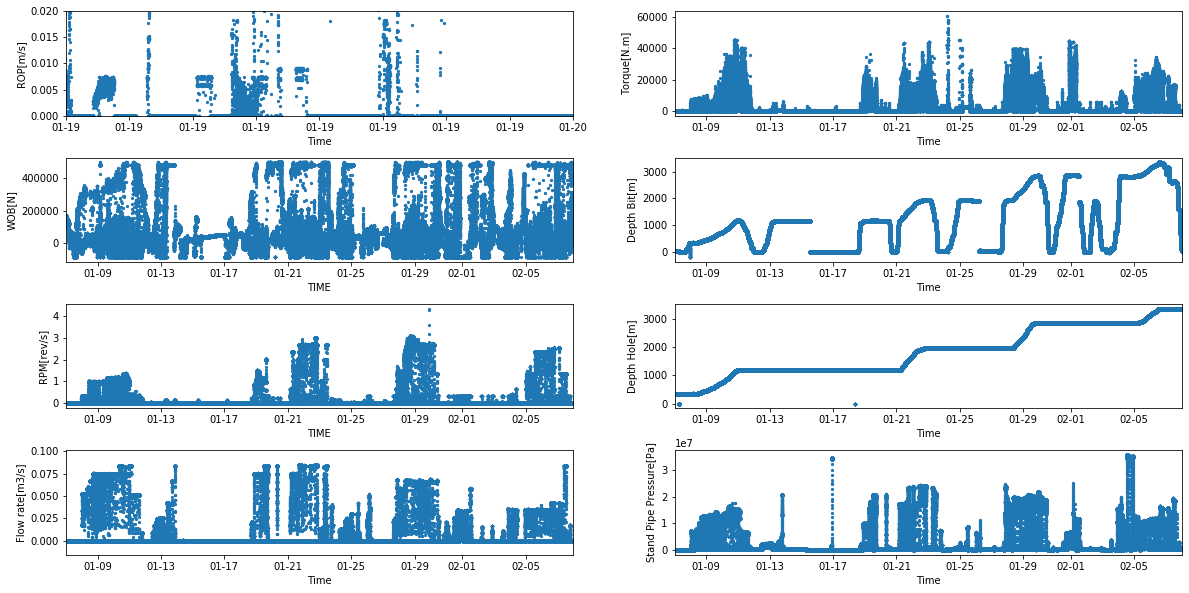

In [13]:
# Plot variables vs time:
date_form = DateFormatter("%m-%d")

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df_ROP['time_ROP'],df_ROP['ROP[m/s]'], s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 1, 19), datetime(2020, 1, 20))
ROP_t.set_ylim(0,0.02)

WOB_t.scatter(df_WOB['time_WOB'],df_WOB['WOB[N]'], s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

RPM_t.scatter(df_RPM['time_RPM'],df_RPM['RPM[rev/s]'], s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

TOR_t.scatter(df_TOR['time_TOR'],df_TOR['Torque[N.m]'], s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DB_t.scatter(df_DB['time_DB'],df_DB['Depth Bit[m]'], s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DH_t.scatter(df_DH['time_DH'],df_DH['Depth Hole[m]'], s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

FR_t.scatter(df_FR['time_FR'],df_FR['Flow rate[m3/s]'], s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

SPP_t.scatter(df_SPP['time_SPP'],df_SPP['Stand Pipe Pressure[Pa]'], s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

plt.show()

In [35]:
# First we change the name of column in all datasets:

df_DB = df_DB.rename(columns={'time_DB':'time'})
df_DH = df_DH.rename(columns={'time_DH':'time'})
df_RPM = df_RPM.rename(columns={'time_RPM':'time'})
df_ROP = df_ROP.rename(columns={'time_ROP':'time'})
df_WOB = df_WOB.rename(columns={'time_WOB':'time'})
df_TOR = df_TOR.rename(columns={'time_TOR':'time'})
df_FR = df_FR.rename(columns={'time_FR':'time'})
df_SPP = df_SPP.rename(columns={'time_SPP':'time'})

# Then we merge the dataframes:

df1 = pd.merge_asof(df_DB,df_DH,on='time', tolerance = pd.Timedelta('0.1s'))
df2 = pd.merge_asof(df_ROP, df_RPM, on='time', tolerance = pd.Timedelta('0.1s'))
df3 = pd.merge_asof(df_WOB, df_TOR, on='time', tolerance = pd.Timedelta('0.1s'))
df4 = pd.merge_asof(df_FR, df_SPP, on='time', tolerance = pd.Timedelta('0.1s'))
df5 = pd.merge_asof(df1, df2, on='time', tolerance = pd.Timedelta('0.1s'))
df6 = pd.merge_asof(df3, df4, on='time', tolerance = pd.Timedelta('0.1s'))
df_merged = pd.merge_asof(df5, df6, on='time', tolerance = pd.Timedelta('0.1s'))

df = df_merged
df

time  Depth Bit[m]  Depth Hole[m]  ROP[m/s]  \
0       2020-01-07 00:00:00+00:00     29.149196          352.0       NaN   
1       2020-01-07 00:00:01+00:00     29.149200          352.0       0.0   
2       2020-01-07 00:00:04+00:00     29.149200          352.0       0.0   
3       2020-01-07 00:00:07+00:00     29.149200          352.0       0.0   
4       2020-01-07 00:00:10+00:00     29.149200          352.0       0.0   
...                           ...           ...            ...       ...   
1646910 2020-02-07 23:59:56+00:00     38.001710            NaN       NaN   
1646911 2020-02-07 23:59:57+00:00     38.001700         3347.0       0.0   
1646912 2020-02-07 23:59:58+00:00     38.001710            NaN       NaN   
1646913 2020-02-07 23:59:59+00:00     38.001710            NaN       NaN   
1646914 2020-02-08 00:00:00+00:00     38.001710         3347.0       0.0   

         RPM[rev/s]    WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
0               NaN       NaN          NaN              NaN   
1               0.0  163521.0          0.0              0.0   
2               0.0  163331.0          0.0              0.0   
3               0.0  163427.0          0.0              0.0   
4               0.0  163282.0          0.0              0.0   
...             ...       ...          ...              ...   
1646910         NaN       NaN          NaN              NaN   
1646911         0.0  126384.0          0.0              0.0   
1646912         NaN       NaN          NaN              NaN   
1646913         NaN       NaN          NaN              NaN   
1646914         0.0  126245.0          0.0              0.0   

         Stand Pipe Pressure[Pa]  
0                            NaN  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
1646910                      NaN  
1646911                 233505.0  
1646912                      NaN  
1646913                      NaN  
1646914                 233685.0  

[1646915 rows x 9 columns]

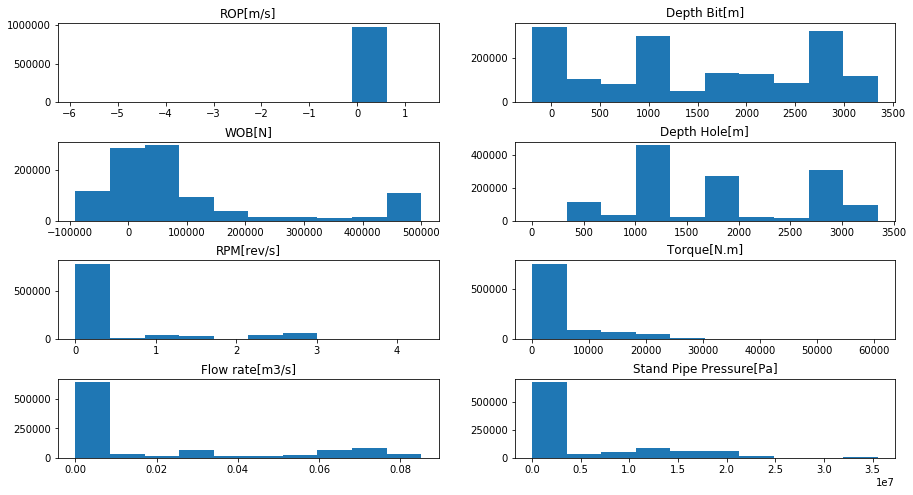

In [36]:
# Print all histograms:
fig2 = plt.figure(figsize=(15, 8))
grid = plt.GridSpec(4, 2, hspace=0.5)
ROP_hist = fig2.add_subplot(grid[0,0])
WOB_hist = fig2.add_subplot(grid[1, 0])
RPM_hist = fig2.add_subplot(grid[2, 0])
DB_hist = fig2.add_subplot(grid[0, 1])
DH_hist = fig2.add_subplot(grid[1, 1])
Tor_hist = fig2.add_subplot(grid[2, 1])
FR_hist = fig2.add_subplot(grid[3, 0])
SPP_hist = fig2.add_subplot(grid[3, 1])


ROP_hist.hist(df_ROP['ROP[m/s]'])
ROP_hist.set(title="ROP[m/s]")
WOB_hist.hist(df_WOB['WOB[N]'])
WOB_hist.set(title="WOB[N]")
RPM_hist.hist(df_RPM['RPM[rev/s]'])
RPM_hist.set(title='RPM[rev/s]')
DB_hist.hist(df_DB['Depth Bit[m]'])
DB_hist.set(title="Depth Bit[m]")
DH_hist.hist(df_DH['Depth Hole[m]'])
DH_hist.set(title="Depth Hole[m]")
Tor_hist.hist(df_TOR['Torque[N.m]'])
Tor_hist.set(title="Torque[N.m]")
FR_hist.hist(df_FR['Flow rate[m3/s]'])
FR_hist.set(title="Flow rate[m3/s]")
SPP_hist.hist(df_SPP['Stand Pipe Pressure[Pa]'])
SPP_hist.set(title="Stand Pipe Pressure[Pa]")


plt.show()

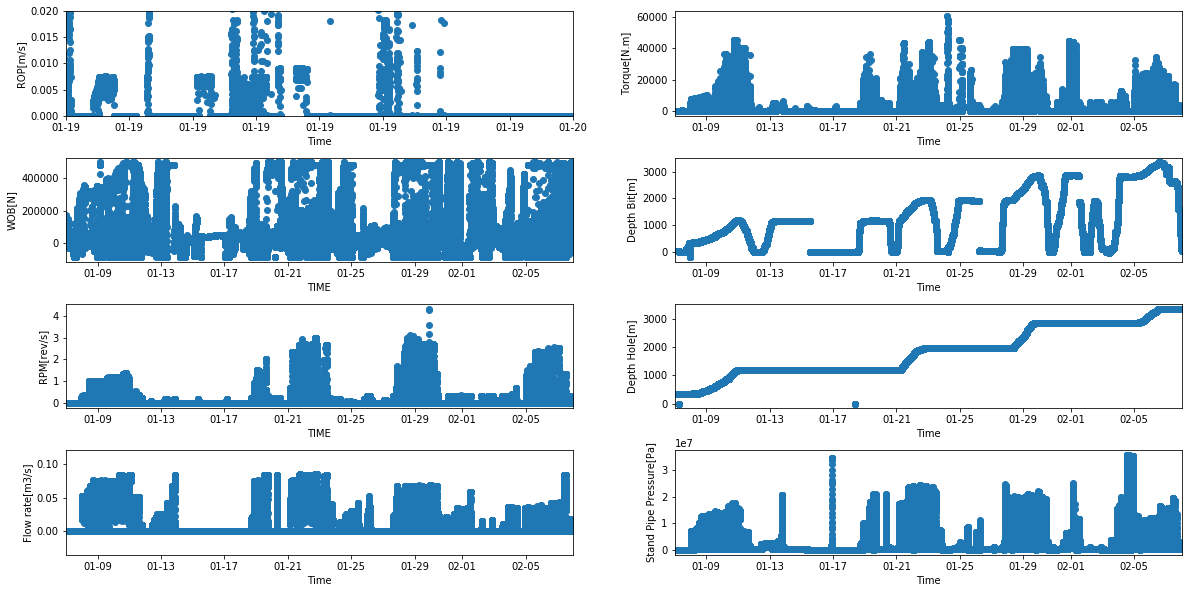

In [45]:
# Plot variables vs time:

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'])
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 1, 19), datetime(2020, 1, 20))
ROP_t.set_ylim(0,0.02)

WOB_t.scatter(df['time'],df['WOB[N]'] )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'])
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'])
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'])
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'])
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'])
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'])
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

plt.show()

In [37]:
# Interpolation:

df_test = df
df_test['ROP[m/s]'] = df_test['ROP[m/s]'].interpolate()
df_test['WOB[N]'] = df_test['WOB[N]'].interpolate()
df_test['Torque[N.m]'] = df_test['Torque[N.m]'].interpolate()
df_test['RPM[rev/s]'] = df_test['RPM[rev/s]'].interpolate()
df_test['Depth Hole[m]'] = df_test['Depth Hole[m]'].interpolate()
df_test['Flow rate[m3/s]'] = df_test['Flow rate[m3/s]'].interpolate()
df_test['Stand Pipe Pressure[Pa]'] = df_test['Stand Pipe Pressure[Pa]'].interpolate()
df_test

time  Depth Bit[m]  Depth Hole[m]  ROP[m/s]  \
0       2020-01-07 00:00:00+00:00     29.149196          352.0       NaN   
1       2020-01-07 00:00:01+00:00     29.149200          352.0       0.0   
2       2020-01-07 00:00:04+00:00     29.149200          352.0       0.0   
3       2020-01-07 00:00:07+00:00     29.149200          352.0       0.0   
4       2020-01-07 00:00:10+00:00     29.149200          352.0       0.0   
...                           ...           ...            ...       ...   
1646910 2020-02-07 23:59:56+00:00     38.001710         3347.0       0.0   
1646911 2020-02-07 23:59:57+00:00     38.001700         3347.0       0.0   
1646912 2020-02-07 23:59:58+00:00     38.001710         3347.0       0.0   
1646913 2020-02-07 23:59:59+00:00     38.001710         3347.0       0.0   
1646914 2020-02-08 00:00:00+00:00     38.001710         3347.0       0.0   

         RPM[rev/s]         WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
0               NaN            NaN          NaN              NaN   
1               0.0  163521.000000          0.0              0.0   
2               0.0  163331.000000          0.0              0.0   
3               0.0  163427.000000          0.0              0.0   
4               0.0  163282.000000          0.0              0.0   
...             ...            ...          ...              ...   
1646910         0.0  126481.666667          0.0              0.0   
1646911         0.0  126384.000000          0.0              0.0   
1646912         0.0  126337.666667          0.0              0.0   
1646913         0.0  126291.333333          0.0              0.0   
1646914         0.0  126245.000000          0.0              0.0   

         Stand Pipe Pressure[Pa]  
0                            NaN  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
1646910                 233454.0  
1646911                 233505.0  
1646912                 233565.0  
1646913                 233625.0  
1646914                 233685.0  

[1646915 rows x 9 columns]

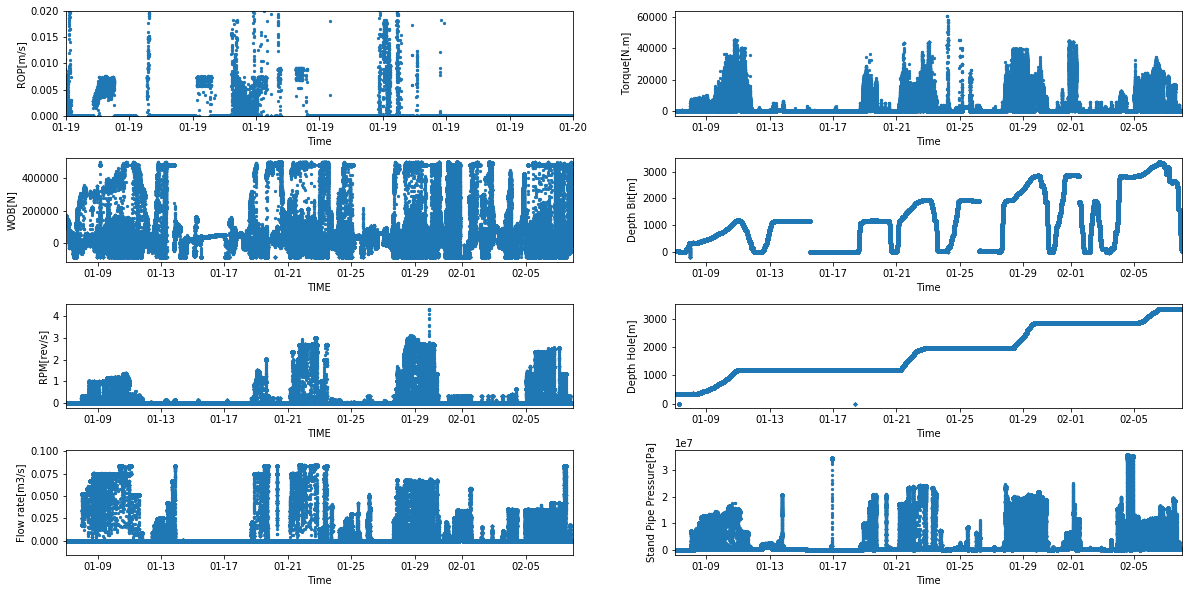

In [47]:
# Plot variables vs time after interpolation:
df = df_test
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 1, 19), datetime(2020, 1, 20))
ROP_t.set_ylim(0,0.02)

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

plt.show()

In [38]:
# Delete rows when ROP is 0
df=df_test
df = df[df['ROP[m/s]']>0]
df

time  Depth Bit[m]  Depth Hole[m]      ROP[m/s]  \
14557   2020-01-07 09:56:59+00:00     -0.941660     352.000000  1.029970e-06   
14558   2020-01-07 09:57:00+00:00     -0.941683     352.000000  2.384250e-08   
14570   2020-01-07 09:57:30+00:00     -0.941746     352.000000  2.861020e-07   
14592   2020-01-07 09:58:23+00:00     -0.941751     352.000000  1.907350e-07   
14597   2020-01-07 09:58:34+00:00     -0.929499     352.000000  2.043690e-04   
...                           ...           ...            ...           ...   
1524226 2020-02-06 13:47:56+00:00   3347.204720    3347.204731  1.271565e-08   
1524227 2020-02-06 13:47:57+00:00   3347.204567    3347.204731  8.477100e-09   
1524228 2020-02-06 13:47:58+00:00   3347.200000    3347.204731  4.238550e-09   
1524229 2020-02-06 13:47:59+00:00   3347.204693    3347.204731  2.825700e-09   
1524230 2020-02-06 13:48:00+00:00   3347.204708    3347.204731  1.412850e-09   

         RPM[rev/s]        WOB[N]   Torque[N.m]  Flow rate[m3/s]  \
14557      0.000000 -32991.100000      0.000000         0.000000   
14558      0.000000 -33166.900000      0.000000         0.000000   
14570      0.000000 -33127.700000      0.000000         0.000000   
14592      0.000000 -32657.300000      0.000000         0.000000   
14597      0.000000 -33047.500000      0.000000         0.000000   
...             ...           ...           ...              ...   
1524226    2.333460 -13400.966667  24311.833333         0.033680   
1524227    2.333530 -13651.333333  24258.466667         0.033674   
1524228    2.333600 -13901.700000  24205.100000         0.033668   
1524229    2.333817 -14333.666667  24087.666667         0.033674   
1524230    2.334033 -14765.633333  23970.233333         0.033680   

         Stand Pipe Pressure[Pa]  
14557               0.000000e+00  
14558               0.000000e+00  
14570               0.000000e+00  
14592               0.000000e+00  
14597               0.000000e+00  
...                          ...  
1524226             1.184880e+07  
1524227             1.184660e+07  
1524228             1.184440e+07  
1524229             1.184497e+07  
1524230             1.184553e+07  

[305782 rows x 9 columns]

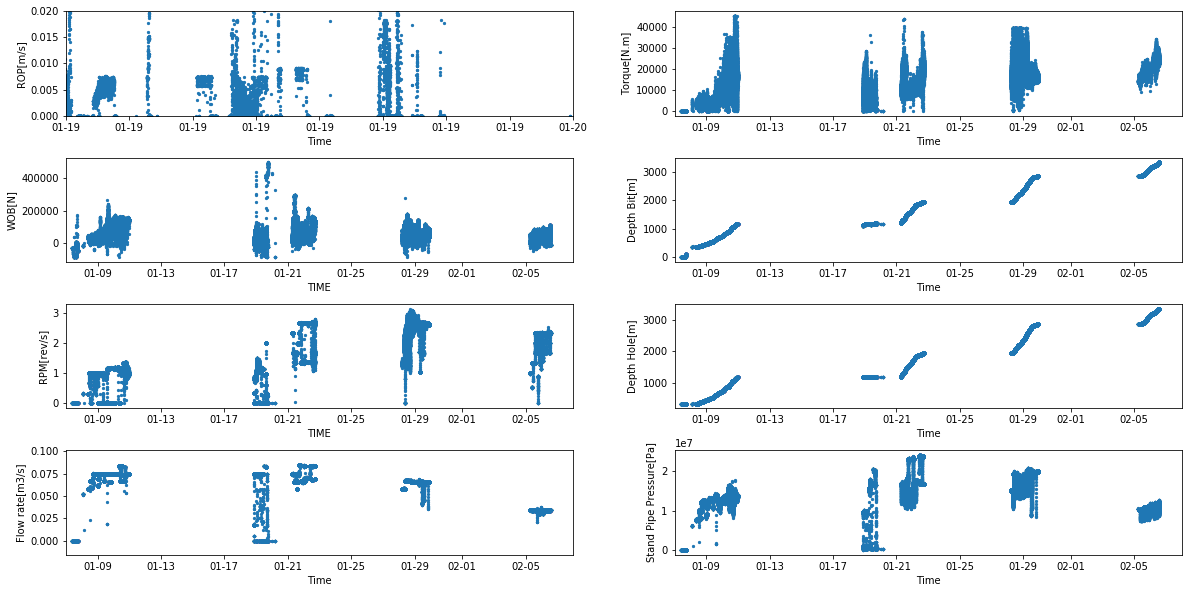

In [18]:
# Plot variables vs time after interpolation:

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 1, 19), datetime(2020, 1, 20))
ROP_t.set_ylim(0,0.02)

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

plt.show()

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


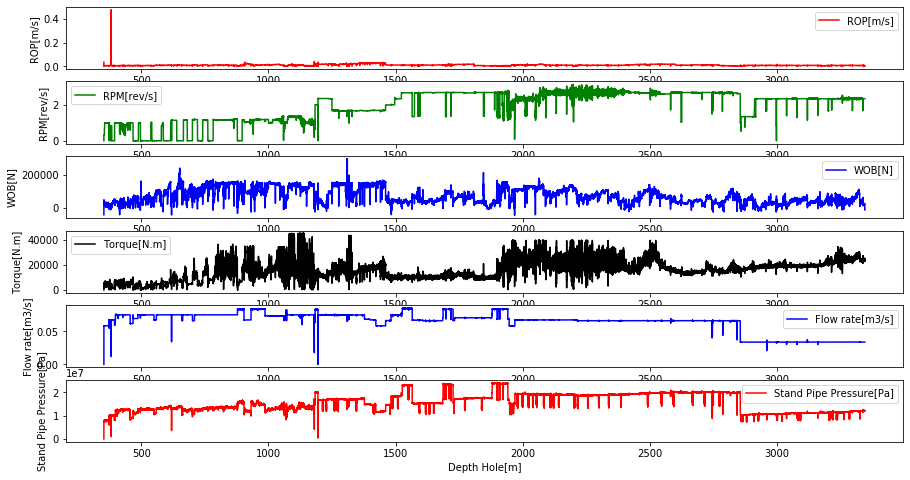

In [19]:
# Plot data vs depth (since the relationship is almost lineal) after interpolation:

fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)
plt.show()

In [51]:
# Removing outliers

Q1_ROP = df['ROP[m/s]'].quantile(0.25)
Q3_ROP = df['ROP[m/s]'].quantile(0.6)
IQR_ROP = Q3_ROP - Q1_ROP

Q1_RPM = df['RPM[rev/s]'].quantile(0.25)
Q3_RPM = df['RPM[rev/s]'].quantile(0.75)
IQR_RPM = Q3_RPM - Q1_RPM

Q1_TOR = df['Torque[N.m]'].quantile(0.25)
Q3_TOR= df['Torque[N.m]'].quantile(0.75)
IQR_TOR = Q3_TOR - Q1_TOR


Q1_WOB = df['WOB[N]'].quantile(0.25)
Q3_WOB = df['WOB[N]'].quantile(0.75)
IQR_WOB = Q3_WOB - Q1_WOB

Q1_SPP = df['Stand Pipe Pressure[Pa]'].quantile(0.25)
Q3_SPP = df['Stand Pipe Pressure[Pa]'].quantile(0.75)
IQR_SPP = Q3_SPP - Q1_SPP

Q1_FR = df['Flow rate[m3/s]'].quantile(0.25)
Q3_FR= df['Flow rate[m3/s]'].quantile(0.75)
IQR_FR = Q3_FR - Q1_FR


df_test_out = df.query('(@Q1_ROP-1.5*@IQR_ROP)<=`ROP[m/s]`<=(@Q3_ROP+1.5*@IQR_ROP)')
# df_test_out = df[(Q1_ROP-1.5*IQR_ROP)<=df['ROP[m/s]']]
# df_test_out = df[df['ROP[m/s]']<=(Q3_ROP+1.5*IQR_ROP)]

df_test_out = df.query('(@Q1_RPM-1.5*@IQR_RPM)<=`RPM[rev/s]`<=(@Q3_RPM+1.5*@IQR_RPM)')
# df_test_out = df[(Q1_RPM-1.5*IQR_RPM)<=df['RPM[rev/s]']]
# df_test_out = df[df['RPM[rev/s]']<=(Q3_RPM+1.5*IQR_RPM)]

df_test_out = df.query('(@Q1_TOR-1.5*@IQR_TOR)<=`Torque[N.m]`<=(@Q3_TOR+1.5*@IQR_TOR)')
# df_test_out = df[(Q1_TOR-1.5*IQR_TOR)<=df['Torque[N.m]']]
# df_test_out = df[df['Torque[N.m]']<=(Q3_TOR+1.5*IQR_TOR)]
df_test_out = df.query('(@Q1_WOB-1.5*@IQR_WOB)<=`WOB[N]`<=(@Q3_WOB+1.5*@IQR_WOB)')
# df_test_out = df[(Q1_WOB-1.5*IQR_WOB)<=df['WOB[N]']]
# df_test_out = df[df['WOB[N]']<=(Q3_WOB+1.5*IQR_WOB)]
df_test_out = df.query('(@Q1_SPP-1.5*@IQR_SPP)<=`Stand Pipe Pressure[Pa]`<=(@Q3_SPP+1.5*@IQR_SPP)')
# df_test_out = df[(Q1_SPP-1.5*IQR_SPP)<=df['Stand Pipe Pressure[Pa]']]
# df_test_out = df[df['Stand Pipe Pressure[Pa]']<=(Q3_SPP+1.5*IQR_SPP)]
df_test_out = df.query('(@Q1_FR-1.5*@IQR_FR)<=`Flow rate[m3/s]`<=(@Q3_FR+1.5*@IQR_FR)')
# df_test_out = df[(Q1_FR-1.5*IQR_FR)<=df['Flow rate[m3/s]']]
# df_test_out = df[df['Flow rate[m3/s]']<=(Q3_FR+1.5*IQR_FR)]

df_test_out

time  Depth Bit[m]  Depth Hole[m]  ROP[m/s]  \
15884   2020-01-07 10:50:30+00:00      7.547144     352.000000  0.049896   
15885   2020-01-07 10:50:33+00:00      7.651040     352.000000  0.049663   
15886   2020-01-07 10:50:36+00:00      7.651080     352.000000  0.049364   
15887   2020-01-07 10:50:39+00:00      7.651050     352.000000  0.049000   
15888   2020-01-07 10:50:40+00:00      7.651028     352.000000  0.048572   
...                           ...           ...            ...       ...   
1524150 2020-02-06 13:46:40+00:00   3347.200000    3347.204727  0.001551   
1524151 2020-02-06 13:46:41+00:00   3347.204609    3347.204727  0.001491   
1524152 2020-02-06 13:46:42+00:00   3347.200000    3347.204727  0.001433   
1524153 2020-02-06 13:46:43+00:00   3347.204708    3347.204727  0.001375   
1524154 2020-02-06 13:46:44+00:00   3347.204502    3347.204727  0.001319   

         RPM[rev/s]        WOB[N]   Torque[N.m]  Flow rate[m3/s]  \
15884      0.000000 -40910.526337     27.253048         0.000000   
15885      0.000000 -41109.315579     27.288200         0.000000   
15886      0.000000 -41314.244197     27.302725         0.000000   
15887      0.000000 -41525.739080     27.297493         0.000000   
15888      0.000000 -41744.296633     27.273508         0.000000   
...             ...           ...           ...              ...   
1524150    2.333357  -8467.876040  24037.708604         0.033686   
1524151    2.333352  -8583.886452  24050.846916         0.033686   
1524152    2.333347  -8696.617286  24063.875641         0.033686   
1524153    2.333342  -8806.221942  24076.769659         0.033686   
1524154    2.333337  -8912.845637  24089.503473         0.033686   

         Stand Pipe Pressure[Pa]  
15884               0.000000e+00  
15885               0.000000e+00  
15886               0.000000e+00  
15887               0.000000e+00  
15888               0.000000e+00  
...                          ...  
1524150             1.194615e+07  
1524151             1.194435e+07  
1524152             1.194256e+07  
1524153             1.194080e+07  
1524154             1.193906e+07  

[305626 rows x 9 columns]

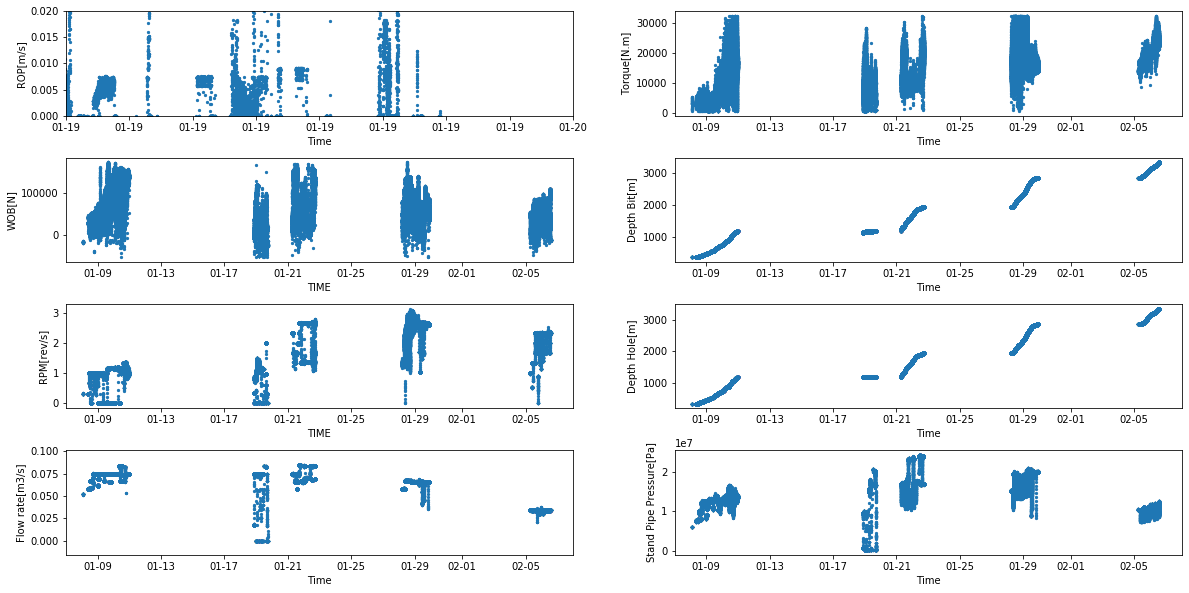

In [52]:
# Plot variables vs time after removing outliers:

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 1, 19), datetime(2020, 1, 20))
ROP_t.set_ylim(0,0.02)

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

plt.show()

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


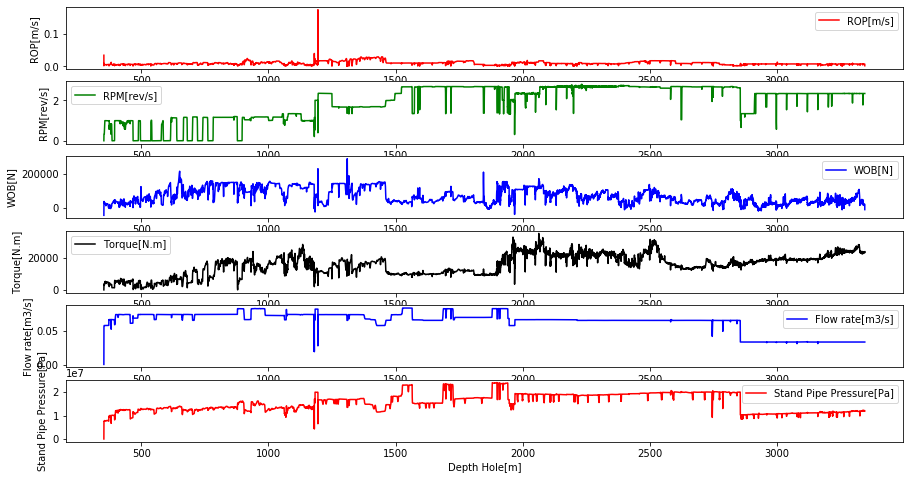

In [52]:
# Plot data vs depth (since the relationship is almost lineal) after removing outliers:

fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

In [54]:
# Noise reduction (window = 30):
df = df_test_out
df_test2 = df
df_test2['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 30, center=True).mean()
df_test2['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 30, center=True).mean()
df_test2['WOB[N]'] = df['WOB[N]'].rolling(window = 30, center=True).mean()
df_test2['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 30, center=True).mean()
df_test2['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 30, center=True).mean()
df_test2['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 30, center=True).mean()
df_test2.dropna(inplace = True)

# Noise reduction (window = 40):
df_test4 = df
df_test4['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 40, center=True).mean()
df_test4['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 40, center=True).mean()
df_test4['WOB[N]'] = df['WOB[N]'].rolling(window = 40, center=True).mean()
df_test4['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 40, center=True).mean()
df_test4['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 40, center=True).mean()
df_test4['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 40, center=True).mean()
df_test4.dropna(inplace = True)

# Noise reduction (window = 70):
df_test5 = df
df_test5['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 40, center=True).mean()
df_test5['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 40, center=True).mean()
df_test5['WOB[N]'] = df['WOB[N]'].rolling(window = 40, center=True).mean()
df_test5['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 40, center=True).mean()
df_test5['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 70, center=True).mean()
df_test5['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 70, center=True).mean()
df_test5.dropna(inplace = True)

# Noise reduction (window = 20):
df_test3 = df
df_test3['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 20, center=True).mean()
df_test3['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 20, center=True).mean()
df_test3['WOB[N]'] = df['WOB[N]'].rolling(window = 20, center=True).mean()
df_test3['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 20, center=True).mean()
df_test3['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 20, center=True).mean()
df_test3['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 20, center=True).mean()
df_test3.dropna(inplace = True)
df_test2

time  Depth Bit[m]  Depth Hole[m]  ROP[m/s]  \
18084   2020-01-07 12:19:22+00:00      0.037928     352.000000  0.000555   
18085   2020-01-07 12:19:24+00:00      0.037928     352.000000  0.000555   
18086   2020-01-07 12:19:27+00:00      0.037928     352.000000  0.000557   
18087   2020-01-07 12:19:30+00:00      0.037928     352.000000  0.000561   
18088   2020-01-07 12:19:33+00:00      0.037928     352.000000  0.000568   
...                           ...           ...            ...       ...   
1523998 2020-02-06 13:44:08+00:00   3346.600000    3346.596684  0.007022   
1523999 2020-02-06 13:44:09+00:00   3346.603726    3346.604065  0.007022   
1524000 2020-02-06 13:44:10+00:00   3346.611447    3346.611447  0.007021   
1524001 2020-02-06 13:44:11+00:00   3346.620000    3346.618511  0.007021   
1524002 2020-02-06 13:44:12+00:00   3346.626087    3346.625914  0.007020   

         RPM[rev/s]        WOB[N]   Torque[N.m]  Flow rate[m3/s]  \
18084      0.000000 -77402.438221     20.877072         0.000000   
18085      0.000000 -77469.479986     20.888050         0.000000   
18086      0.000000 -77537.145575     20.898317         0.000000   
18087      0.000000 -77605.440523     20.907857         0.000000   
18088      0.000000 -77674.362470     20.916659         0.000000   
...             ...           ...           ...              ...   
1523998    2.333235  22135.767999  23805.279113         0.033685   
1523999    2.333238  22143.245481  23799.051360         0.033685   
1524000    2.333241  22150.079955  23792.787070         0.033685   
1524001    2.333244  22156.216114  23786.489741         0.033685   
1524002    2.333246  22161.596006  23780.162925         0.033685   

         Stand Pipe Pressure[Pa]  
18084               0.000000e+00  
18085               0.000000e+00  
18086               0.000000e+00  
18087               0.000000e+00  
18088               0.000000e+00  
...                          ...  
1523998             1.214060e+07  
1523999             1.214049e+07  
1524000             1.214038e+07  
1524001             1.214026e+07  
1524002             1.214014e+07  

[305314 rows x 9 columns]

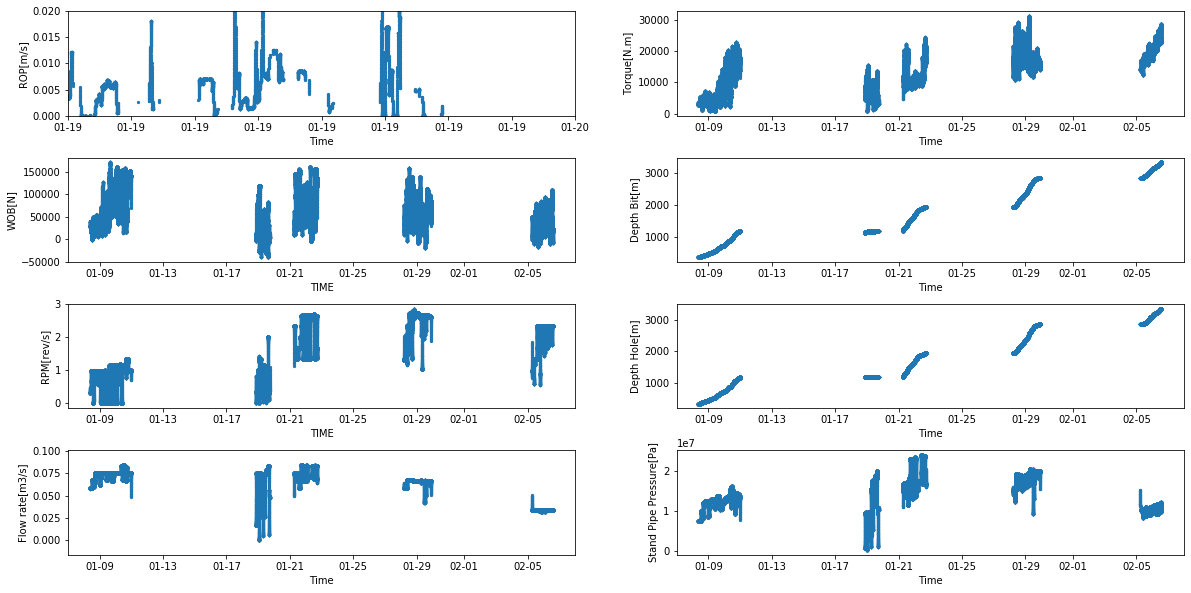

In [55]:
# Plot variables vs time after removing NOISE:
df = df_test2
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 1, 19), datetime(2020, 1, 20))
ROP_t.set_ylim(0,0.02)

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

plt.show()

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


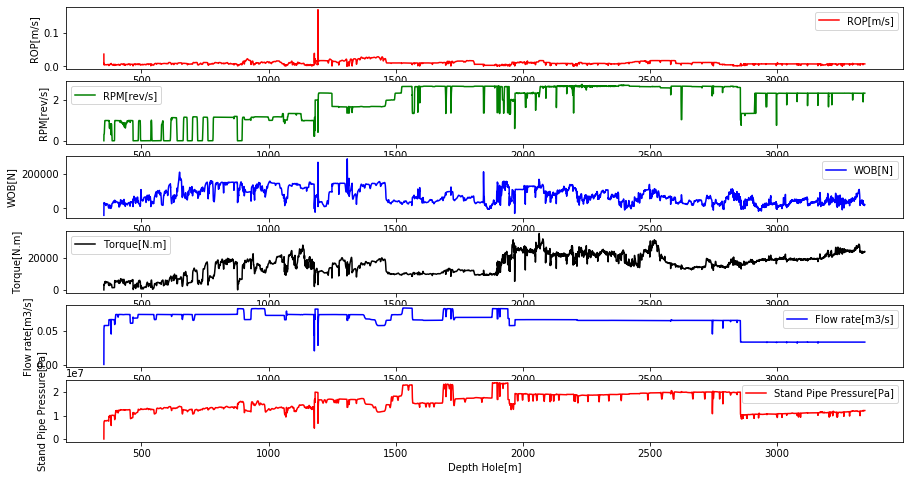

In [55]:
# Plot data vs depth (since the relationship is almost lineal) after removing NOISE:
df = df_test2
fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

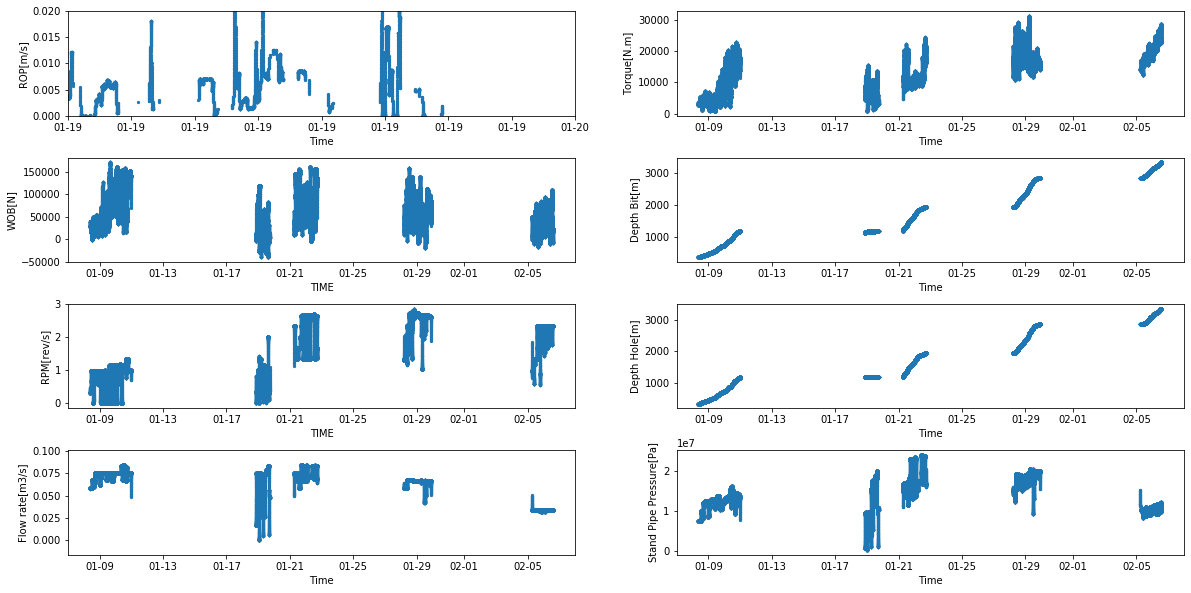

In [57]:
# Plot variables vs time after removing NOISE (window 70):
df = df_test5
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 1, 19), datetime(2020, 1, 20))
ROP_t.set_ylim(0,0.02)

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 1, 7), datetime(2020, 2, 8))

plt.show()

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


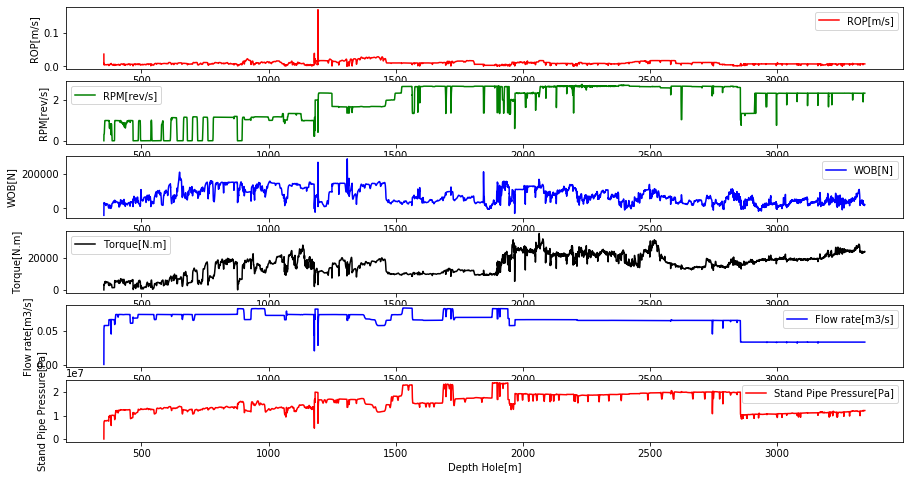

In [56]:
# Plot data vs depth (since the relationship is almost lineal) after removing NOISE(window 70):
df = df_test5
fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

In [60]:
df = df_test2
df = df[df['ROP[m/s]']<0.02]
df.to_csv(r'Cleaned wells/NO162D18-2.csv', index = False, header=True)

In [1]:
# Plot data vs depth (since the relationship is almost lineal) after removing NOISE(window 70):

fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

NameError: name 'plt' is not defined